# **Team Details**

### **Group Number: 22**
### **Team Members:**
1.   Sabari S Kumar [2020MT12100]
2.   Ranjith V [2020MT12081]
3.   Sujith Sugathan [2020MT12281]

### **Details of individual contribution:**
1.   **Sabari S Kumar** [2020MT12100]: Exploratory Data Analysis, Classification using Logistic Regression implementation, Validation of results, Comparison with LogisticRegression in sklearn, label encoding, sampling, data visualization, structuring and annoting the notebook
2.   **Ranjith V** [2020MT12081]: Exploratory Data Analysis, Clustering implementation (K Means), Validation of clusters, Comparison with K-means in sklearn, data scaling (MinMax), data visualization, structuring and annoting the notebook
3.   **Sujith Sugathan** [2020MT12281]: Outlier detection using LOF implementation, validation of results, comparison with LocalOutlierFactor in sklearn, data cleaning, data visualization, structuring and annoting the notebook

### Colab link: https://colab.research.google.com/drive/1GagkgxikTzz-X2eXpC2ClSDam3rDQNWA?usp=sharing

### HTML output for the last file also attached with the submission


In [1]:
## Optional installation
## No need to run if the packages are already installed

!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
## importing libraries

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


%matplotlib inline

# 1. Selection of dataset

## Mushroom dataset

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as edible or poisonous.

## Key Questions /  Insights:

1. Carry out exploratory data analysis to obtain any key insights from the given data.

2. Classify a given mushroom as 'Edible' or 'Non-Edible'

3. Carry out a clustering analysis to identify the number of clusters which the given set of mushrooms can be divided into. (Optional - Identify if any of the clusters can be clearly identified as edible or non-edible.

4. Carry out outlier analysis.... <tbd>

# 2. Preprocessing and visualization

## Reading dataset
Data is loaded from github

In [52]:
# read dataset
def read_data_to_df():
    
    #df=pd.read_csv("https://raw.githubusercontent.com/sabarisk2005/datarepo/main/mushrooms.csv")
    df=pd.read_csv("mushrooms.csv")
    return df

### Setting all seeds to ensure reproducible results

In [53]:
import os
import random

def set_seed_for_reproducible_results(seed):
  seed_value= seed
  os.environ['PYTHONHASHSEED']=str(seed_value)
  random.seed(seed_value)
  np.random.seed(seed_value)

set_seed_for_reproducible_results(0)


## 2.1 Data pre-processing

### 2.1.1 Splits the dataset to training and test sets

In [54]:
# split the data for training/testing
def split_data_randomly(dataset, ratio, seed):
  train_data = dataset.sample(frac = ratio, replace=False, random_state=seed)
  test_data = dataset.drop(train_data.index)
  return train_data,test_data

In [55]:
def cross_validation(model,x_data,y_data):
  model_copy = copy.copy(model) 
  model_copy.fit_data(x_data,y_data)
  model_copy.score(x_data,y_data)



### 2.1.2 Min-max scaler implementation

In [56]:
class Minimum_maximum_scaler():
  def __init__(self, feature_range=(0, 1)):
    self.feature_range = feature_range
      
  def fit(self, X):
    data_min = np.min(X, axis=0)
    data_range = np.max(X, axis=0) - data_min
    print(type(data_range))
    if(data_range==0).any():
      data_range=1
    self.scale_ = (self.feature_range[1] - self.feature_range[0]) / data_range
    self.min_ = self.feature_range[0] - data_min * self.scale_
    self.data_range = data_range
    self.data_min = data_min
    return self

  def transform(self, X):
    X *= self.scale_
    X += self.min_
    return X.to_numpy()

  def fit_transform(self,X):
    self.fit(X)
    return self.transform(X)
        

### 2.1.3 Wrapper for scaling function

In [57]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
sc = MinMaxScaler()
#sc=Minimum_maximum_scaler()
def getScaledDataFrame(input_df,fit=False):
  if(fit==True):
    out_array = sc.fit_transform(input_df)
  else:
    out_array = sc.transform(input_df)
  return out_array

In [58]:
from sklearn.preprocessing import LabelEncoder
def encodeDataSet(dataset):
  df = dataset.copy()
  Lb = LabelEncoder()
  for features in df.columns:
    df[features] = Lb.fit_transform(df[features])
  df.head()
  return df

### 2.1.4 Cleans the dataset with na and null values

In [59]:
def clean_data_set(tdf,feature_name,feature_value):
  drop_indices = tdf[(tdf[feature_name]==feature_value)].index
  tdf.drop(drop_indices, inplace = True)
  tdf.dropna()
  return tdf


### 2.1.5 Label encodes categorical variables

In [60]:
def label_encode(dataset):
  cols=dataset.columns
  col_dict = {}
  for col in cols:
    if(dataset[col].dtype == np.float64 or dataset[col].dtype == np.int64):
      continue
    u_list=dataset[col].unique()
    val_dict = {}
    col_dict[col]=val_dict
    for item in u_list:
      i = list(u_list).index(item)
      val_dict[item] = i
  dataset = dataset.replace(col_dict)
  return dataset

### 2.1.6 Wrapper function for scaling and then splitting data to train and test

In [61]:
def prepare_data(df,target_class):
  train_data,test_data=split_data_randomly(df,0.8,4)
  y_train_data= train_data[target_class].copy()
  x_train_data=train_data.drop([target_class], axis = 1)
  x_train_data.reset_index(drop=True, inplace=True)
  y_train_data.reset_index(drop=True, inplace=True)
  x_train_data=getScaledDataFrame(x_train_data,True)
  y_test_data= test_data[target_class].copy()
  x_test_data=test_data.drop([target_class], axis = 1)
  x_test_data.reset_index()
  x_test_data.reset_index(drop=True, inplace=True)
  y_test_data.reset_index(drop=True, inplace=True)
  x_test_data=getScaledDataFrame(x_test_data,False)
  return x_train_data,y_train_data,x_test_data,y_test_data

### 2.1.7 Cleans up the data of special characters like '?'

In [62]:
def clean_and_encode_data(dataset):
  remdf=clean_data_set(dataset,"stalk-root","?")
  return label_encode(remdf)

### 2.1.8 Read data 



In [63]:
tdf=read_data_to_df()
target_class='class'
column_names=tdf.columns
tdf


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Attribute Information: 

**classes:** edible=e, poisonous=p

**cap-shape:** bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

**cap-surface:** fibrous=f,grooves=g,scaly=y,smooth=s

**cap-color:** brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

**bruises:** bruises=t,no=f

**odor:** almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

**gill-attachment:** attached=a,descending=d,free=f,notched=n

**gill-spacing:** close=c,crowded=w,distant=d

**gill-size:** broad=b,narrow=n

**gill-color:** black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

**stalk-shape:** enlarging=e,tapering=t

**stalk-root:** bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

**stalk-surface-above-ring:** fibrous=f,scaly=y,silky=k,smooth=s

**stalk-surface-below-ring:** fibrous=f,scaly=y,silky=k,smooth=s

**stalk-color-above-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**stalk-color-below-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**veil-type:** partial=p,universal=u

**veil-color:** brown=n,orange=o,white=w,yellow=y

**ring-number:** none=n,one=o,two=t

**ring-type:** cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

**spore-print-color:** black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

**population:** abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

**habitat:** grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

**Data need to be pre-processed**:


1.   Check for null and na values
2.   Clean special characters like '?'
3.   Categorical variables need to be encoded
4.   Data needs to be scaled



## 2.1.9 Carrying out Exploratory Data Analysis

**Feature Counts** (Histogram)

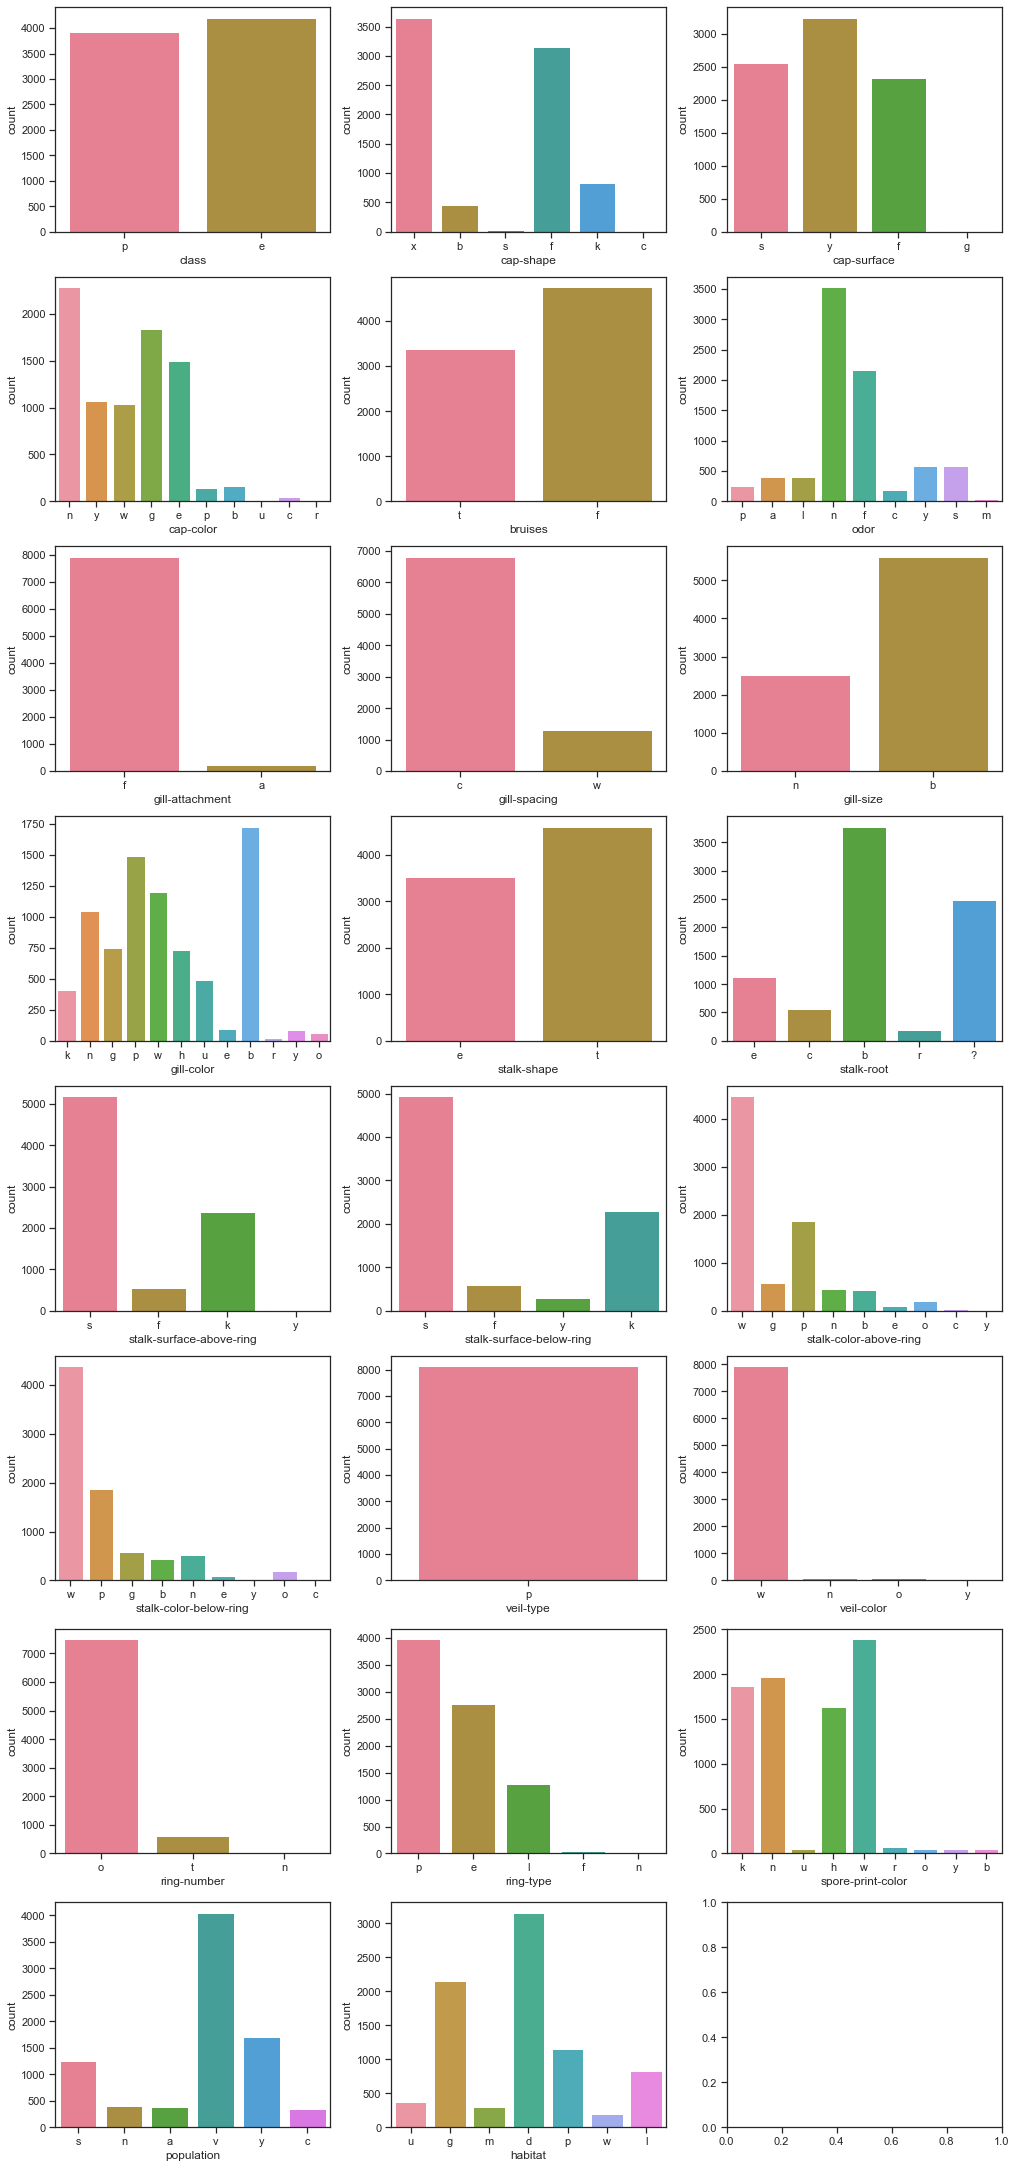

In [64]:
def data_countplot(df):
  fig, axs = plt.subplots(8, 3, figsize=(14,30), constrained_layout=True)
  for i, f in enumerate(df.columns):
    sns.countplot(x=f, data=df, ax=axs[i//3][i%3])
  plt.show()

data_countplot(tdf)

1. It can be observed that all the mushrooms in the dataset have Veil Type as "Partial"

**Feature Counts for Edible Mushrooms**

In [65]:
edible_tdf=tdf[tdf["class"]=='e']
poison_tdf=tdf[tdf["class"]=='p']

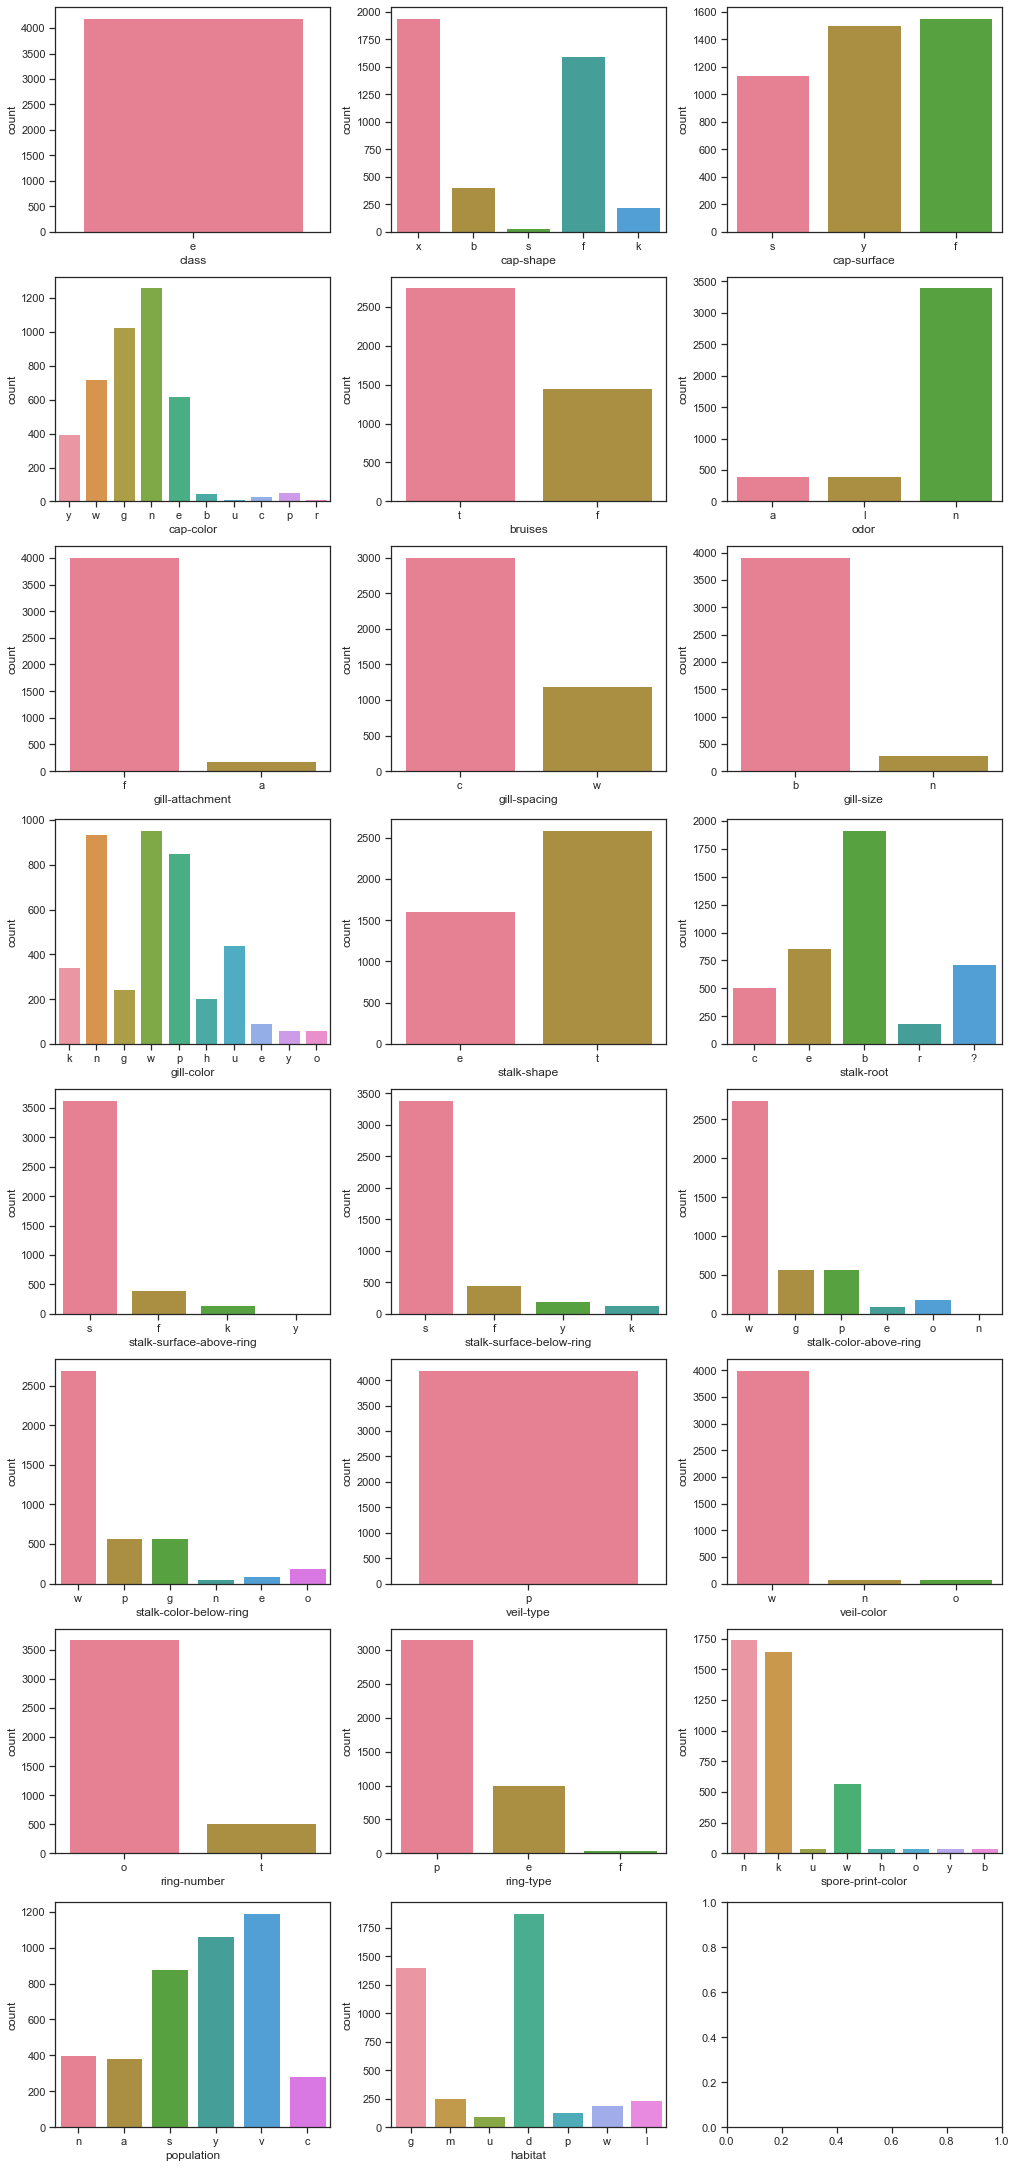

In [66]:
data_countplot(edible_tdf)

**Feature Counts for Posionous Mushrooms**

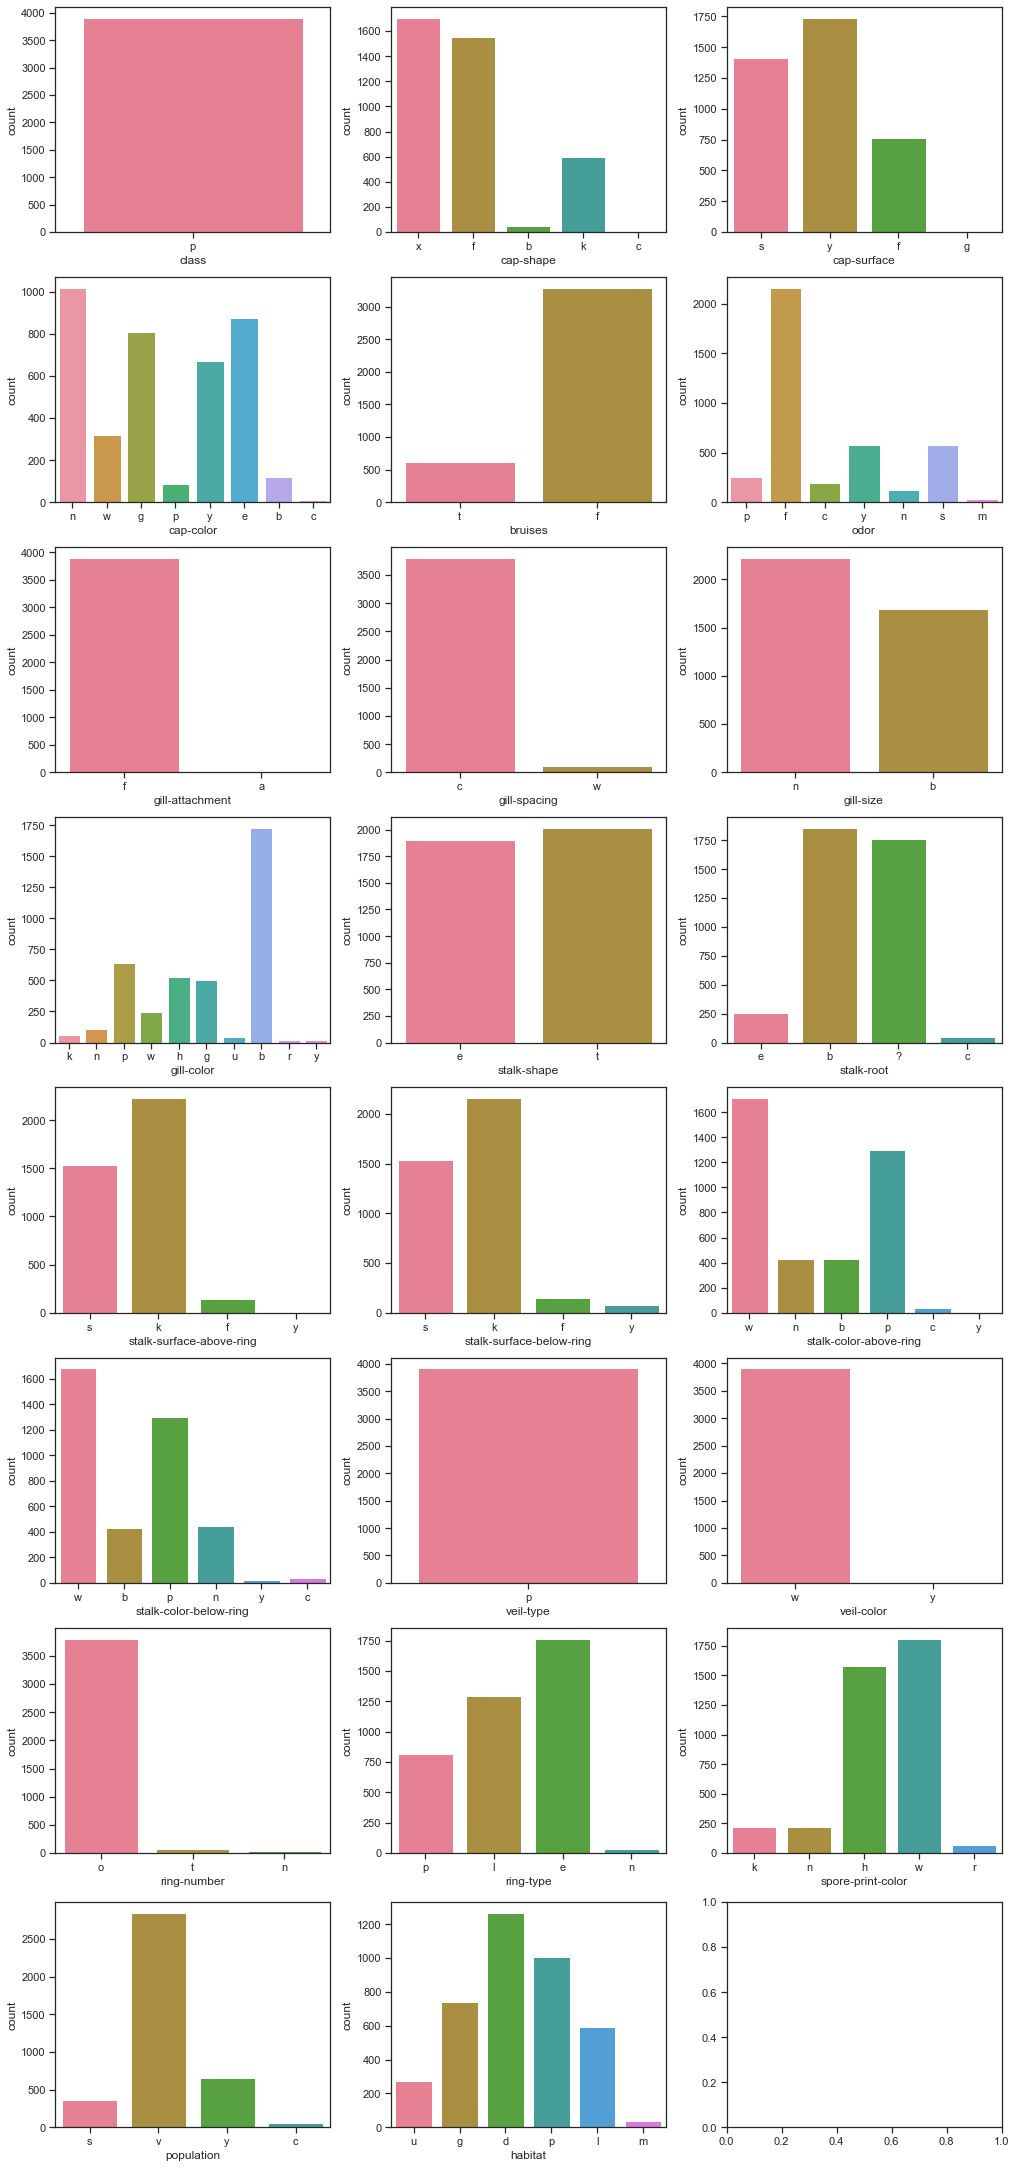

In [67]:
data_countplot(poison_tdf)

## Key Insights

As observed from the dataset

1. Only Poisonous mushrooms have convex cap-shape and cap-surface with grooves.

2. Only Edible mushrooms have green or purple cap-color

3. Type of odor can be a strong indicator of whether a mushroom is edible or poisonous

4. Only Poisonous mushrooms have buff or green gill color, while edible mushrooms have red or orange gill color

5. Only Edible mushrooms have rooted stalk root

6. Stalk_color_above_ring & Stalk_color_below_ring 
Gray, Red, Orange are observed only in Edible mushrooms whereas 
Buff, Cinnamon, Yellow  are observed only in Poisonous mushrooms.

7. Only poisonous mushrooms exhibit green spore print color

8. Only edible musrooms have been shown to grow in 'waste type' habitat



## Pre Processing

**Data need to be pre-processed**:


1.   Check for null and na values
2.   Clean special characters like '?'
3.   Categorical variables need to be encoded
4.   Data needs to be scaled

### 2.1.10 Clean and encode data

In [68]:
df=clean_and_encode_data(tdf)

### 2.1.11 Result after pre-processing the data

**Displaying dataset**

In [69]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,1,1,1,0,1,3,0,0,1,4,...,2,3,4,0,0,1,0,5,4,4
8001,1,0,1,0,1,3,0,0,1,4,...,2,3,4,0,0,1,0,5,4,4
8038,1,0,1,3,0,3,0,0,1,4,...,0,0,0,0,0,1,0,5,4,4
8095,0,0,1,7,1,6,0,0,1,8,...,2,5,5,0,0,2,3,5,5,3


**Check for null values**

In [70]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**Check for NA values**

In [71]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Pre-processing completed. 

### 2.1.12 Split data to training and test

In [72]:
x_train_data,y_train_data,x_test_data,y_test_data=prepare_data(df,target_class)
x_train_data.shape

(4515, 22)

## 2.2 Data visualization 

### 2.2.1 Correlation plot

Printing correlation matrix 

In [73]:
corr = df.corr()
pos_corr=corr[corr["class"]<-0.5]
corr

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,-0.012738,0.068231,-0.121709,-0.435562,-0.415438,-0.071945,0.264160,0.215289,-0.129357,...,-0.648231,-0.496583,-0.403539,NaN,-0.047921,-0.120634,-0.580420,-0.682245,-0.141568,0.053653
cap-shape,-0.012738,1.000000,0.061266,0.006390,0.024314,0.031966,0.036518,0.012686,0.045297,0.060692,...,0.066042,0.081847,0.094223,NaN,0.047866,0.071161,0.076913,0.103736,0.128877,0.030009
cap-surface,0.068231,0.061266,1.000000,-0.018024,0.170464,0.231799,-0.011919,-0.079934,0.079547,0.078234,...,0.184989,0.311082,0.294905,NaN,-0.007939,-0.098754,0.204256,0.001669,0.387680,0.328787
cap-color,-0.121709,0.006390,-0.018024,1.000000,-0.037622,0.289324,0.057650,-0.058742,0.031560,0.141792,...,-0.073184,0.019587,0.042405,NaN,-0.026314,0.158058,-0.041243,0.166598,0.099936,0.085354
bruises,-0.435562,0.024314,0.170464,-0.037622,1.000000,0.559444,0.064351,0.439183,-0.040178,-0.036862,...,0.643622,0.416310,0.382574,NaN,0.042863,0.007218,0.830229,0.409097,0.007056,-0.061334
odor,-0.415438,0.031966,0.231799,0.289324,0.559444,1.000000,0.151638,0.011745,0.261129,0.264612,...,0.454124,0.502011,0.451342,NaN,-0.000648,0.158408,0.530517,0.492609,0.353483,0.280530
gill-attachment,-0.071945,0.036518,-0.011919,0.057650,0.064351,0.151638,1.000000,-0.026630,0.021353,0.095599,...,0.050650,0.163367,0.164673,NaN,-0.002131,0.520652,0.157052,0.150416,0.093391,0.036296
gill-spacing,0.264160,0.012686,-0.079934,-0.058742,0.439183,0.011745,-0.026630,1.000000,-0.178484,-0.148132,...,-0.173242,-0.342702,-0.264082,NaN,0.080026,-0.074985,0.099214,-0.175159,-0.378184,-0.228317
gill-size,0.215289,0.045297,0.079547,0.031560,-0.040178,0.261129,0.021353,-0.178484,1.000000,0.115416,...,0.246351,0.268924,0.182452,NaN,-0.099801,0.060127,0.240390,0.093165,0.105979,0.109261
gill-color,-0.129357,0.060692,0.078234,0.141792,-0.036862,0.264612,0.095599,-0.148132,0.115416,1.000000,...,0.093794,0.197613,0.202523,NaN,0.063676,0.167014,0.065731,0.221718,0.257183,0.212575


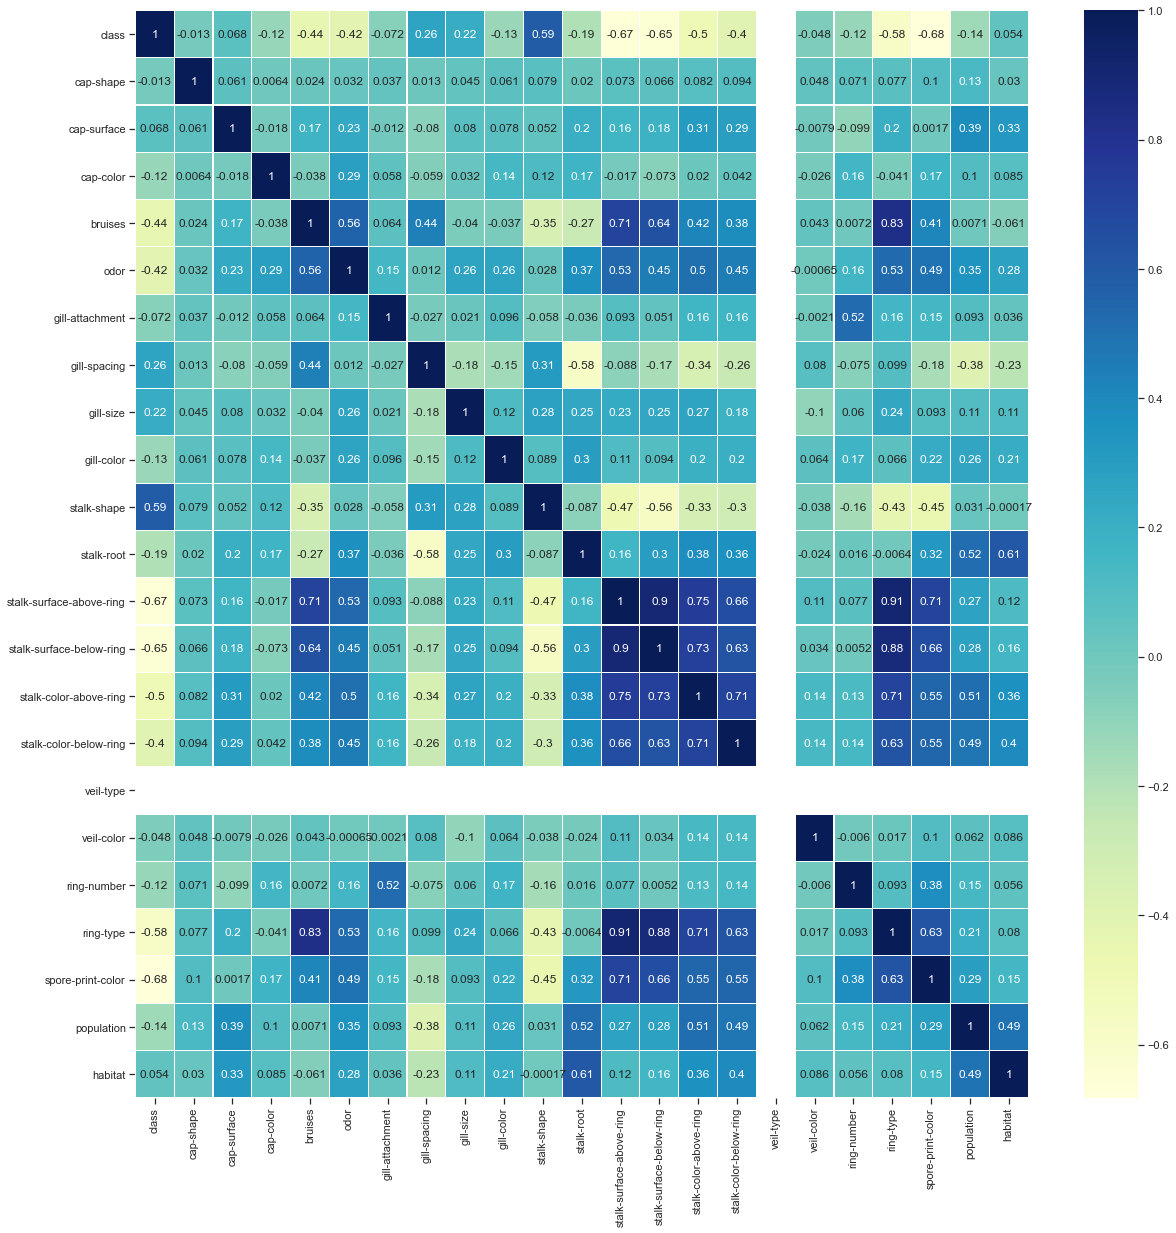

In [74]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

Plotting heatmap for high correlation attributes alone

<AxesSubplot:>

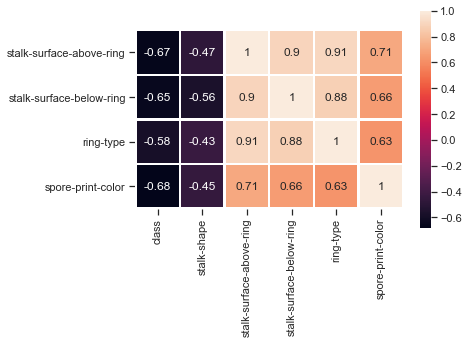

In [75]:
sns.heatmap(data=pos_corr[['class', 'stalk-shape','stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-type','spore-print-color']], square=True , annot=True, cbar=True, linewidths=1.5)

## Key Insights

Based on the correlation plots it is observed that the output class is highly correlated with the features:  
1. Stalk surface above ring
2. Stalk surface below ring
3. Ring type
4. Spore print color.

Also these features are observed to be negatively correlated to the output class

### 2.2.2 Pair Plot 

Plotting for high correlation parameters

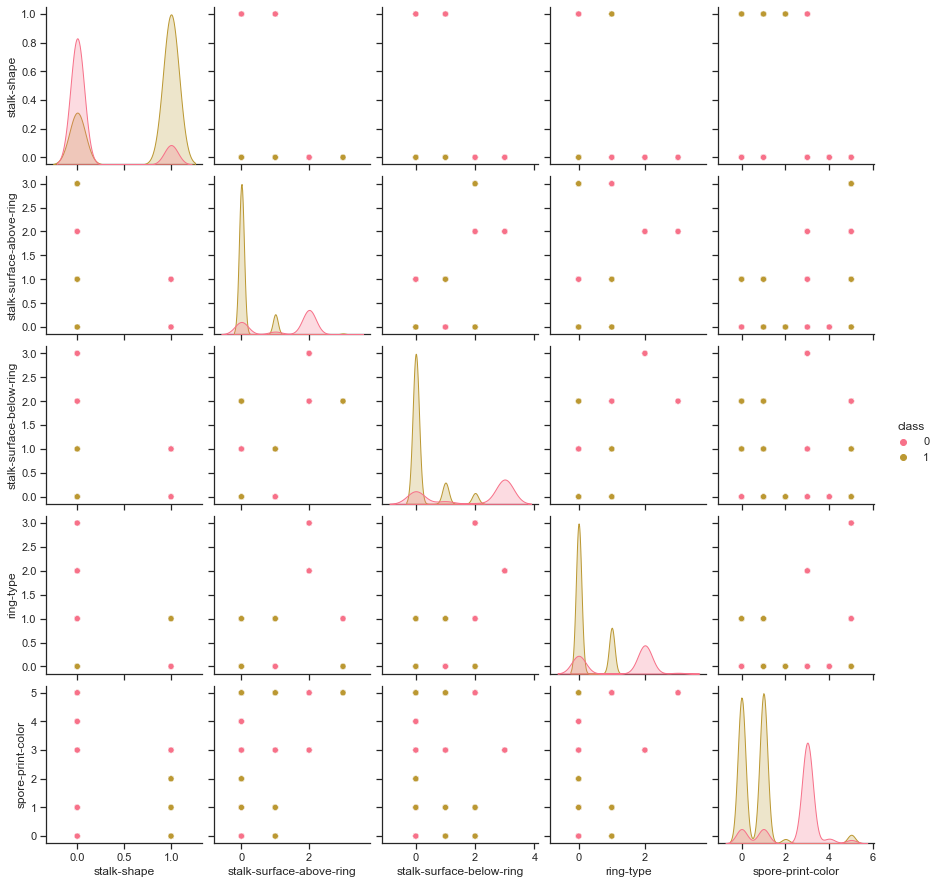

In [76]:
sns.pairplot(df[['class', 'stalk-shape','stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-type','spore-print-color']],hue="class")
sns.set(style="ticks")
sns.set_palette("husl")

# 3. Implementation of three data analysis techniques

## Three data analysis techniques are implmented:


1.   **Classification using Logistic Regression**
2.   **Clustering using K-means**
3.   **Outlier detection using LOF**

## **All three techniques are implemented from scratch**
## Analysis using sklearn is also available side-by-side


## 3.1 Classification using **Logisitic regression** (Custom Implementation)

In [77]:
# Base class for all classifiers. 
# Handles common accuracy related parameters

class Classifier():
  accuracy=0.0

  def __init__(self):
    x=0

  def score(self,X_data,Y):
    pred=self.predict_y(X_data)
    pred["truth"]=(Y)
    match_df=pred.loc[pred['predicted']==pred['truth']]
    all_one_df=pred.loc[pred['truth']==1]
    all_zero_df=pred.loc[pred['truth']==0]
    all_one_pred_df=pred.loc[pred['predicted']==1]
    all_zero_pred_df=pred.loc[pred['predicted']==0]
    one_match_df=match_df.loc[match_df['predicted']==1]
    zero_match_df=match_df.loc[match_df['predicted']==0]
    one_support=all_one_df.shape[0]
    zero_support=all_zero_df.shape[0]
    one_recall=100*one_match_df.shape[0]/one_support if one_support>0 else 0
    one_precision=100*one_match_df.shape[0]/one_support if one_support>0 else 0
    one_f1=2*(one_precision*one_recall/(one_precision+one_recall)) if one_support>0 else 0
    zero_recall=100*zero_match_df.shape[0]/zero_support if zero_support>0 else 0
    zero_precision=100*zero_match_df.shape[0]/zero_support if zero_support>0 else 0
    zero_f1=2*(zero_precision*zero_recall/(zero_precision+zero_recall)) if zero_support>0 else 0
    self.accuracy=(match_df.shape[0] / pred.shape[0])*100
    confusion=pd.DataFrame(np.array([[0,self.accuracy ,zero_precision,zero_recall,zero_f1,zero_support], 
                                      [1,self.accuracy ,one_precision,one_recall,one_f1,one_support]]),
                    columns=['Class','Accuracy', 'Precision', 'Recall',"F-score",'Support'])

    return confusion
  

In [78]:
class LogisticRegressionClassifier(Classifier):

  theta=np.zeros(10)
  intercept=1
  intercept_array=np.ones((10, 1)) 

  def __init__( self, learn_rate=0.01, max_iter=1000,intercept=0.0):
    self.learn_rate=learn_rate
    self.max_iter=max_iter
    self.intercept = intercept

  def sigmoid_function(self,X_data, weight_array):
    zt = np.dot(X_data, weight_array)
    z=zt+self.intercept_array
    res=1 / (1 + np.exp(-z))    
    return res

  #h is the sigmoid of (x.weight) ie, sigmoid(z)
  def loss_function(h_theta, y):
    return (-y * np.log(h_theta) - (1 - y) * np.log(1 - h_theta)).mean()

  def gradient_descent(self, X, h_theta, y):
    return np.dot(X.T, (h_theta - y)) / y.shape[0]

  def update_weight_array(self,weight, learning_rate, gradient):
    return weight - learning_rate * gradient

  def fit_data(self,x_data,y_data):
    self.theta = np.zeros(x_data.shape[1])
    self.intercept_array = np.full((x_data.shape[0], ), self.intercept)
    x_array=x_data
    for i in range(self.max_iter):
      h_theta=self.sigmoid_function(x_array,self.theta)
      gradient = self.gradient_descent(x_array, h_theta, y_data)
      self.theta = self.update_weight_array(self.theta, self.learn_rate, gradient)
    return self.theta

  def predict_y(self,x_data):
    self.intercept_array = np.full((x_data.shape[0], ), self.intercept)
    x_array=x_data
    result=self.sigmoid_function(x_array,self.theta)
    df = pd.DataFrame(result)
    df['raw']=df[0]
    df['predicted'] = df[0].apply(lambda x : 0 if x < 0.50 else 1)
    return df



## 3.2 Clustering using K means

In [79]:
class KMeansClustering():
  k=2
  centroids=0
  prev_centroids=0
  data_groups=0
  max_iter=0
  y_array=0
  def __init__(self,k=2,max_iter=1000):
    self.k=k
    self.max_iter=max_iter

  def fit(self,x_data):
    num_rows, num_cols = x_data.shape
    self.initialize_centroids(num_cols)
    #intialize y_array
    y_array=np.zeros(num_rows)
    for i in range(0,self.max_iter):
      y_array=self.associate_datapoints_to_centroids(x_data,y_array)
      self.update_centroids(x_data,y_array)
    
    return self.centroids
    

  def predict(self,x_data):
    num_rows, num_cols = x_data.shape
    y_array=np.zeros(num_rows)
    y_array=self.associate_datapoints_to_centroids(x_data,y_array)
    return y_array

  def associate_datapoints_to_centroids(self,x_data,y_array):
    distance_matrix=self.compute_distance_matrix(x_data,self.centroids)
    cntr=0
    for dt in x_data:
      class_labelx=self.get_index_of_min_value(distance_matrix[cntr])
      y_array[cntr]=class_labelx
      cntr=cntr+1
    # assign the min value column's label to correspondin value of y_array
    return y_array

  def get_index_of_min_value(self,distance_vector):
    #result = np.where(distance_vector == np.amin(distance_vector))
    #return result[0][0]
    dv=distance_vector.tolist()
    result=dv.index(min(dv))
    return result            

  def update_centroids(self,x_data,y_data):
    self.prev_centroids=self.centroids.copy()
    feature_names_list=[]
    for i in range(x_data.shape[1]):
      feature_names_list = feature_names_list + [i]
    X_df=pd.DataFrame(x_data,columns=feature_names_list)
    X_df['cluster_index']=y_data
    for i in range(self.k):
      col_mean_array=0
      sdf=X_df[X_df['cluster_index']==i]
      col_mean=sdf.mean(axis=0)
      col_mean_array=col_mean.to_numpy()
      perc=sdf.shape[0]/X_df.shape[0]
      self.centroids[i]=col_mean_array[0:-1]

    return self.centroids

  def compute_distance_matrix(self,source_array,target_array):
    #create a matrix for all n points as rows and distance to each centroid as columns
    distance_matrix=np.zeros((int(source_array.shape[0]),int(target_array.shape[0])))
    for i in range(0,int(source_array.shape[0])):
      for j in range(0,int(target_array.shape[0])):
        distance_matrix[i,j]=np.linalg.norm(source_array[i]-target_array[j])
    return distance_matrix

  def initialize_centroids(self,number_of_features):
    self.centroids = np.random.uniform(0,1, size=(self.k,number_of_features))
    #print(self.centroids)
    self.prev_centroids = np.random.uniform(0,1, size=(self.k,number_of_features))
    return self.centroids

  def compute_distance(self,point1,point2):
    return np.linalg.norm(point1 - point2)

## 3.3 **Outlier detection using LOF**

In [80]:
from sklearn.neighbors import NearestNeighbors

def knn_inner_distance(pts,k):
  summation=0
  for i in range(len(pts)):
    pt = pts[i]
    for other_pt in pts[i:]:
      summation = summation + np.linalg.norm(pt - other_pt)
  return summation / (k * (k - 1))

def compute_lof(x_data,k_value):
  X_data_lof=x_data
  k = k_value
  knn = NearestNeighbors(n_neighbors=k)
  knn.fit(X_data_lof)
  # kth nearest neighbor distance
  neighbors_and_distances = knn.kneighbors(X_data_lof)
  knn_distances = neighbors_and_distances[0]
  neighbors = neighbors_and_distances[1]
  kth_distance = [x[-1] for x in knn_distances]

  # Average distance from every point to its nearest neighbor
  tnn_distance = np.mean(knn_distances, axis=1)

  inner_distances = [knn_inner_distance(X_data_lof[ns],k_value) for ns in neighbors]
  ldofs = [x/y for x,y in zip(tnn_distance, inner_distances)]

  local_reach_density = []
  for i in range(X_data_lof.shape[0]):
    pt = X_data_lof[i]
    sum_reachability = 0
    neighbor_distances = knn_distances[i]
    pt_neighbors = neighbors[i]
    for neighbor_distance, neighbor_index in zip(neighbor_distances, pt_neighbors):
      neighbors_kth_distance = kth_distance[neighbor_index]
      sum_reachability = sum_reachability + max([neighbor_distance, neighbors_kth_distance])
        
    avg_reachability = sum_reachability / k
    local_reach_density.append(1/avg_reachability)

  local_reach_density = np.array(local_reach_density)
  lofs = []
  for i in range(X_data_lof.shape[0]):
    pt = X_data_lof[i]
    avg_lrd = np.mean(local_reach_density[neighbors[i]])
    lofs.append(avg_lrd/local_reach_density[i])

  return lofs

# Running K-means implemented from scratch

In [98]:
set_seed_for_reproducible_results(10)

For 2 clusters, the average silhouette score is: 0.38208520234957855
For 3 clusters, the average silhouette score is: 0.41211585007319895
For 4 clusters, the average silhouette score is: 0.44336437154212405
For 5 clusters, the average silhouette score is: 0.43615265666979247


Text(0.5, 1.0, 'Silhoutte Curve (Custom Implementation)')

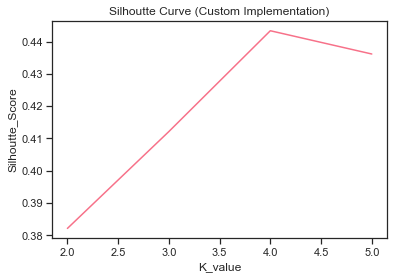

In [99]:
from sklearn.metrics import silhouette_samples, silhouette_score

def run_kmeans_clustering_from_scratch(k, max_iter):
  kmean=KMeansClustering(k,max_iter)
  kmean.fit(x_train_data)
  y_pred=kmean.predict(x_train_data)
  #plt.scatter(x_train_data[:,0],x_train_data[:,1],c=y_pred,cmap='rainbow')
  if(max(y_pred)<1):
    print("All points clustered around single centroid. Undefined!")
    return 0
  avg_sil_score= silhouette_score(x_train_data, y_pred)
  print("For", k, "clusters, the average silhouette score is:",avg_sil_score)
  return avg_sil_score

sil_scores=[]
k_array=[]
for i in range(2,6):
  sil_score=run_kmeans_clustering_from_scratch(i,20)
  sil_scores.append(sil_score)
  k_array.append(i)

kmdf = pd.DataFrame(sil_scores, columns = ['Silhoutte_Score'])
kmdf["K_value"]=k_array
sns.lineplot(data=kmdf, x="K_value", y="Silhoutte_Score").set_title("Silhoutte Curve (Custom Implementation)")

# Running k-means using sklearn

For 2 clusters, the average silhouette score is: 0.38208520234957855
For 3 clusters, the average silhouette score is: 0.4125817890809067
For 4 clusters, the average silhouette score is: 0.4421527260866804
For 5 clusters, the average silhouette score is: 0.46163801462654713


Text(0.5, 1.0, 'Silhoutte Curve (sklearn)')

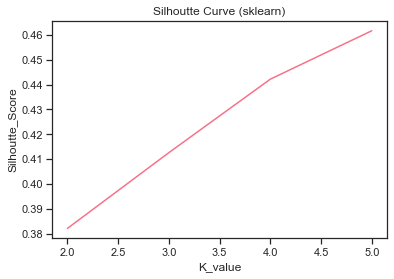

In [100]:
from sklearn.cluster import KMeans

def run_kmeans_using_sklearn(cluster_count):
  kmeans = KMeans(n_clusters=cluster_count, random_state=2,max_iter=20)
  mod=kmeans.fit(x_train_data)
  y_p=kmeans.predict(x_train_data)
  #plt.scatter(x_train_data[:,1],x_train_data[:,6],c=y_p,cmap='rainbow')
  avg_sil_score= silhouette_score(x_train_data, y_p)
  print("For", cluster_count, "clusters, the average silhouette score is:",avg_sil_score)
  return avg_sil_score

sil_scores_sk=[]
k_sk_array=[]
for i in range(2,6):
  sil_score_sk=run_kmeans_using_sklearn(i)
  sil_scores_sk.append(sil_score_sk)
  k_sk_array.append(i)
skdf = pd.DataFrame(sil_scores_sk, columns = ['Silhoutte_Score'])
skdf["K_value"]=k_sk_array
sns.lineplot(data=skdf, x="K_value", y="Silhoutte_Score").set_title("Silhoutte Curve (sklearn)")


# Running logistic regression from scratch

In [84]:
def run_logistic_regression(learning_rate, max_iter, bias):
  print("Running logistic regression %f,%d,%f"% (learning_rate, max_iter, bias))
  lrc= LogisticRegressionClassifier(learning_rate,max_iter,bias)
  theta=lrc.fit_data(x_train_data,y_train_data)
  pred=lrc.predict_y(x_test_data)
  pred["predicted"].hist()
  confusion=lrc.score(x_test_data,y_test_data)
  print("\nConfusion Matrix: ")
  print(confusion)
  print("------------------------------------")

Running logistic regression 0.010000,2000,0.000000

Confusion Matrix: 
   Class   Accuracy  Precision     Recall    F-score  Support
0    0.0  88.396811  76.443418  76.443418  76.443418    433.0
1    1.0  88.396811  95.833333  95.833333  95.833333    696.0
------------------------------------


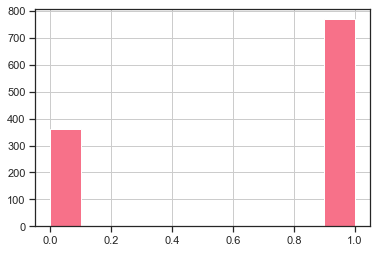

In [85]:
run_logistic_regression(0.010000,2000,0)

## Accuracy of Logistic Regression: **88.39 %** (Custom Implementation)

# Running Logistic regression using SKLEARN for comparison


C:\Users\niran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       696

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129



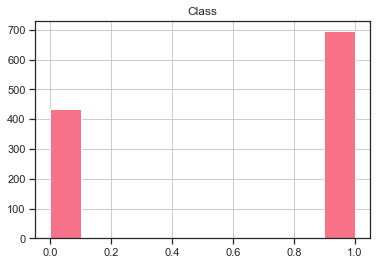

In [86]:
# For comparison 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
def run_logistic_regression_using_sklearn():
  logreg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=5) 
  logreg.fit(x_train_data,y_train_data) # train
  #logreg.coef_
  y_prob  = logreg.predict(x_test_data)
  ydf=pd.DataFrame(y_prob, columns = ['Class'])
  ydf.hist()
  acc = accuracy_score(y_test_data, y_prob)
  conf_matrix = classification_report(y_test_data, y_prob) 
  print('Confusion Matrix :')
  print(conf_matrix)

run_logistic_regression_using_sklearn()

## Accuracy of Logistic Regression: **99.61%** (Sklearn Implementation)

# Running LOF for outlier detection (From Scratch)

In [87]:
lofs=compute_lof(x_train_data,3)
lofs_array = np.array(lofs)
sz=len(lofs_array)
out_status=np.zeros(sz, dtype = int)
cnt=0
for lof in lofs_array:
  if(lof>=1):
    out_status[cnt]=1
  else:
    out_status[cnt]=-1
  cnt=cnt+1

lofdf = pd.DataFrame(x_train_data, columns = column_names[1:])
lofdf["outlier_status"]=out_status


In [88]:
out_lof_df=lofdf[lofdf["outlier_status"]==-1]
print("No of outliers: %d "% (out_lof_df.shape[0]))

No of outliers: 562 


### Detected **562** outliers (Last run)

<AxesSubplot:xlabel='outlier_status', ylabel='Count'>

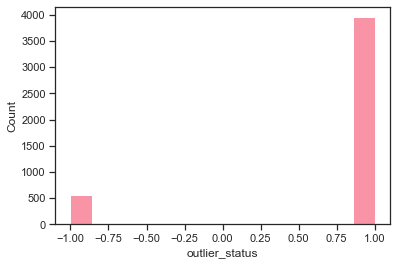

In [89]:
sns.histplot(data=lofdf, x="outlier_status")

## Histogram shows the number of outliers and normal values
### -1 represents outliers and 1 represents normal data

# Running LOF for outlier detection using sklearn (for comparison)

In [90]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=3, contamination=0.1)
y_ol_pred = clf.fit_predict(x_train_data)
outdf = pd.DataFrame(x_train_data, columns = column_names[1:])
outdf["outlier_status"]=y_ol_pred
outliers_df=outdf[outdf["outlier_status"]==-1]
print("No of outliers: %d "% (outliers_df.shape[0]))

No of outliers: 452 


### Detected **452** outliers (Last run)

<AxesSubplot:xlabel='outlier_status', ylabel='Count'>

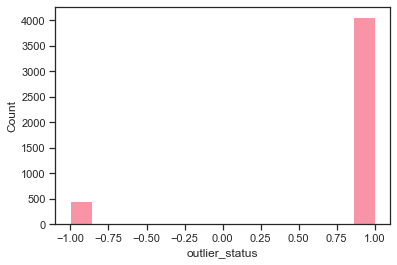

In [91]:
sns.histplot(data=outdf, x="outlier_status")

## Histogram shows the number of outliers and normal values
### -1 represents outliers and 1 represents normal data